**MSI600 - Introducción a Ciencia de Datos - Actividad Individual**


Se dispone de un archivo de datos denominado "datos_caudal.xlsx", el cual contiene cinco variables cuantitativas hidrológicas para predecir niveles de caudal de un determinado río.

La entrega consiste en un único archivo ipynb denominado **MSI600-apellido-nombre.ipynb**.


1. Para cada variable determine el promedio, mediana y desviación estándar.

In [2]:
import pandas as pd
import seaborn as sns #para realizar graficos
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Respuesta 1
df = pd.read_excel('datos_caudal.xlsx',sheet_name=["Sheet1"])
df1 = df['Sheet1']
cols = df1.columns.values
for nom_col  in cols:
    a = nom_col
    print(a)
    dfc1 =df1[a]
    print(a," muestra Promedio",dfc1.mean())
    print(a," Muestra Median",dfc1.median())
    print(a," Muestra std",dfc1.std())
    print()

2. Determine cuáles son las variables que están más correlacionadas linealmente. 

In [4]:
df1.corr

<bound method DataFrame.corr of       Var1  Var2  Var3  Var4  Var5  Caudal
0     3.85  3.86  3.76  3.65   0.0    3.69
1     3.86  3.76  3.65  3.69   0.0    3.61
2     3.76  3.65  3.69  3.61   0.0    3.54
3     3.65  3.69  3.61  3.54   0.0    3.48
4     3.69  3.61  3.54  3.48   0.0    3.44
...    ...   ...   ...   ...   ...     ...
6805  7.11  7.10  7.00  6.80   0.0    6.52
6806  7.10  7.00  6.80  6.52   0.0    6.37
6807  7.00  6.80  6.52  6.37   8.0    6.26
6808  6.80  6.52  6.37  6.26   0.0    6.22
6809  6.52  6.37  6.26  6.22   0.0    5.93

[6810 rows x 6 columns]>

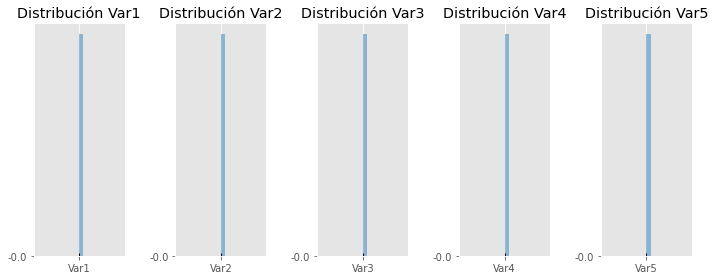

In [5]:
#Respuesta 2
#sns.pairplot(data=df1)
plt.style.use('ggplot')

fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(10, 4))

axs[0].hist(x="Var1", bins=20, color="#3182bd", alpha=0.5)
axs[0].plot("Var1", np.full_like("Var1", -0.01), '|k', markeredgewidth=1)
axs[0].set_title('Distribución Var1')

axs[1].hist(x="Var2", bins=20, color="#3182bd", alpha=0.5)
axs[1].plot("Var2", np.full_like("Var2", -0.01), '|k', markeredgewidth=1)
axs[1].set_title('Distribución Var2')

axs[2].hist(x="Var3", bins=20, color="#3182bd", alpha=0.5)
axs[2].plot("Var3", np.full_like("Var3", -0.01), '|k', markeredgewidth=1)
axs[2].set_title('Distribución Var3')

axs[3].hist(x="Var4", bins=20, color="#3182bd", alpha=0.5)
axs[3].plot("Var4", np.full_like("Var4", -0.01), '|k', markeredgewidth=1)
axs[3].set_title('Distribución Var4')

axs[4].hist(x="Var5", bins=20, color="#3182bd", alpha=0.5)
axs[4].plot("Var5", np.full_like("Var5", -0.01), '|k', markeredgewidth=1)
axs[4].set_title('Distribución Var5')

plt.tight_layout();
#por el resultado de los graficos, las variables estan altamente correlacionadas

3. Un experto opina que una buena predicción para el caudal es considerar el promedio de las primeras variables. Agregue una columna denominada *caudal_pred* que indique este promedio. Además agregue una columna *error_pred* que calcule la diferencia en valor absoluto entre el caudal real y la predicción. 

In [ ]:
#Respuesta 3
def fncCaudal_pred (x1,x2,x3,x4,x5):
  return ((x1+x2+x3+x4+x5)/5)

def fncError_pred (Caure, Pred):
  return np.absolute(Caure - Pred)


df1["caudal_pred"] = df1.apply(lambda x:fncCaudal_pred(x["Var1"],x["Var2"],x["Var3"],x["Var4"],x["Var5"]),axis=1)
df1["error_pred"] = df1.apply(lambda x:fncError_pred(x["Caudal"],x["caudal_pred"]),axis=1)

df1.head()

4. Si un caudal es menor que 5 entonces es considerado *bajo*. Si un caudal es mayor o igual que 5 pero menor que 10 es considerado *medio*. Si el caudal es mayor o igual que 10 es considerado *alto*. Agregue una columna que indique el nivel del caudal.

In [ ]:
#Respuesta 4
def fncDef_Caudal (Caudal):
  if Caudal <= 5:
    return "Bajo"
  elif(Caudal> 5 and Caudal<=10):
    return "Medio"
  else:    
    return "Alto"

df1["NivelCaudal"] = df1.apply(lambda x:fncDef_Caudal(x["Caudal"]),axis=1)
df1.head()

Determine el valor mínimo, máximo y promedio para los caudales con nivel bajo, medio y alto.

In [ ]:
#Respuesta 5
print("Minimos por caudal:",df1.groupby("NivelCaudal")["Caudal"].min())

print("\nMaximos por caudal:",df1.groupby("NivelCaudal")["Caudal"].max())

print("\nPromedios por caudal:",df1.groupby("NivelCaudal")["Caudal"].mean())